In [1]:
from poola import core as pool
import pandas as pd
import seaborn as sns
import gpplot
import matplotlib.pyplot as plt

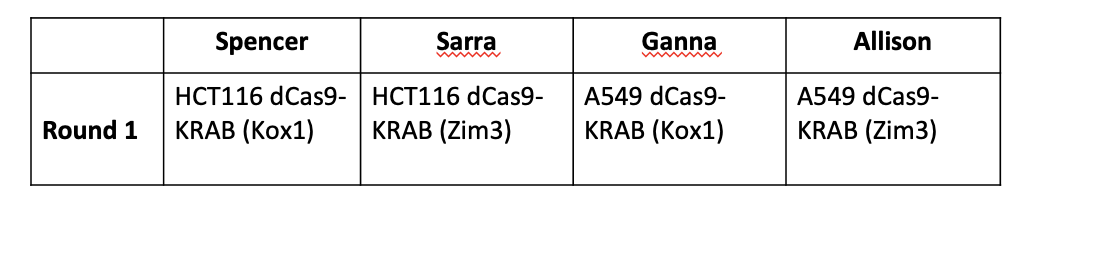

          - KRAB (Kox1)   KRAB (Zim3)
    - HCT116     x            
    - A549       x            x


In [2]:
# readcount files
file_path = "../Data/PrimaryLibrary/tiling/HCT116_Kox1/"
HCT116_Kox1 = pd.read_table(file_path + 'counts-STS_HCT116_RDB181.txt')


In [3]:
# additional information on the readcount files
col6 = pd.read_csv('../Data/PrimaryLibrary/design/CRISPRi_6col_sgRNA.csv')
ess_noness = pd.read_csv('../Data/PrimaryLibrary/design/essentials_nonessentials_CRISPRi_tiling_designs_v2.csv')
ess_noness = ess_noness[['Target Gene Symbol','Target Gene ID','Category','TSS Position', 
       'sgRNA \'Cut\' Site TSS Offset','sgRNA Sequence', 
           'sgRNA Context Sequence', 'On-Target Ruleset',
       'On-Target Efficacy Score']]
ess_noness = pd.merge(col6[['Target Gene Symbol', 'sgRNA Sequence']], ess_noness)
ess_noness.head()

,Target Gene Symbol,sgRNA Sequence,Target Gene ID,Category,TSS Position,sgRNA 'Cut' Site TSS Offset,sgRNA Context Sequence,On-Target Ruleset,On-Target Efficacy Score
0,ATP5F1B,ATAGCGACGTCCGTTGGACA,506.0,Essential,56645984.0,-255.0,GATCATAGCGACGTCCGTTGGACAGGGTAA,RS3seq-Chen2013,0.9257
1,ATP5F1B,ACCCGGACTACGCCATGTTG,506.0,Essential,56645984.0,24.0,CTCCACCCGGACTACGCCATGTTGGGGTTT,RS3seq-Chen2013,0.7588
2,ATP5F1B,AGTACCCCTATTCAACCGGA,506.0,Essential,56645984.0,396.0,GTTCAGTACCCCTATTCAACCGGAAGGTCA,RS3seq-Chen2013,0.7492
3,ATP5F1B,TAATCAGAGGAACTACGTTT,506.0,Essential,56645984.0,-278.0,AGGGTAATCAGAGGAACTACGTTTAGGAAA,RS3seq-Chen2013,0.7506
4,ATP5F1B,TATGGCTGTCACCTAGATCA,506.0,Essential,56645984.0,-362.0,CCCCTATGGCTGTCACCTAGATCAAGGACC,RS3seq-Chen2013,0.9978


In [4]:
annotation_df = ess_noness[['sgRNA Sequence', 'Target Gene Symbol','Target Gene ID']].copy()
annotation_df.to_csv(file_path + 'annotation_file.csv', index = False)

# process HCT116_Kox1


In [5]:
lognorms_HCT116_Kox1 = pool.lognorm_columns(reads_df=HCT116_Kox1, columns=['HCT116_RDB_181 repA','pDNA  CP1948', 'HCT116_RDB_181 repB'])
filtered_lognorms_lognorms_HCT116_Kox1 = pool.filter_pdna(lognorm_df=lognorms_HCT116_Kox1, pdna_cols=['pDNA  CP1948'], z_low=-3)
print('Filtered ' + str(lognorms_HCT116_Kox1.shape[0] - filtered_lognorms_lognorms_HCT116_Kox1.shape[0]) + ' rows due to low pDNA abundance')


Filtered 553 rows due to low pDNA abundance


In [6]:
lfc_df_HCT116_Kox1 = pool.calculate_lfcs(lognorm_df=filtered_lognorms_lognorms_HCT116_Kox1, 
                                         ref_col='pDNA  CP1948', target_cols=['HCT116_RDB_181 repA', 'HCT116_RDB_181 repB'])
lfc_df_HCT116_Kox1.head()


,Construct Barcode,Construct IDs,HCT116_RDB_181 repA,HCT116_RDB_181 repB,Unlabeled Sample Barcodes
0,ATAGCGACGTCCGTTGGACA,ATAGCGACGTCCGTTGGACA,-0.138300,0.148099,0
1,ACCCGGACTACGCCATGTTG,ACCCGGACTACGCCATGTTG,-1.620041,-1.658089,0
2,AGTACCCCTATTCAACCGGA,AGTACCCCTATTCAACCGGA,0.173086,0.073104,0
3,TAATCAGAGGAACTACGTTT,TAATCAGAGGAACTACGTTT,-0.138867,-0.052559,0
4,TATGGCTGTCACCTAGATCA,TATGGCTGTCACCTAGATCA,-1.081762,-1.030780,0


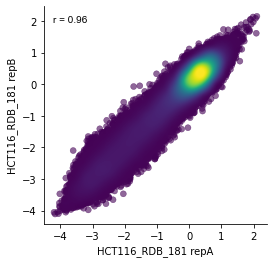

In [7]:
plt.subplots(figsize=(4,4))
gpplot.point_densityplot(data=lfc_df_HCT116_Kox1, x='HCT116_RDB_181 repA', y='HCT116_RDB_181 repB')
gpplot.add_correlation(data=lfc_df_HCT116_Kox1, x='HCT116_RDB_181 repA', y='HCT116_RDB_181 repB')
sns.despine()

In [8]:
lfc_df_HCT116_Kox1 = lfc_df_HCT116_Kox1[['Construct Barcode','HCT116_RDB_181 repA','HCT116_RDB_181 repB' ]]

In [9]:
avg_replicate_lfc_df_HCT116_Kox1 = pool.average_replicate_lfcs(lfcs=lfc_df_HCT116_Kox1, guide_col='Construct Barcode', condition_indices=[0],
                                                   sep='_')
avg_replicate_lfc_df_HCT116_Kox1.head()

,Construct Barcode,condition,avg_lfc,n_obs
0,AAAAAAAAAAATTAGACCTC,HCT116,-0.257163,2
1,AAAAAAAAAACTGTTATTTG,HCT116,0.260982,2
2,AAAAAAAAAAGGGCACCAAG,HCT116,-0.539878,2
3,AAAAAAAAAAGGTCATTCAG,HCT116,-0.272546,2
4,AAAAAAAAAATCAGACTAAC,HCT116,-0.048408,2


In [10]:
annotation_df

,sgRNA Sequence,Target Gene Symbol,Target Gene ID
0,ATAGCGACGTCCGTTGGACA,ATP5F1B,506.0
1,ACCCGGACTACGCCATGTTG,ATP5F1B,506.0
2,AGTACCCCTATTCAACCGGA,ATP5F1B,506.0
3,TAATCAGAGGAACTACGTTT,ATP5F1B,506.0
4,TATGGCTGTCACCTAGATCA,ATP5F1B,506.0
...,...,...,...
108569,ATGAGCTAACGGAGGCACGA,ONE_INTERGENIC_996,NaN
108570,TTGCCTTCGCTGTCAAACCC,ONE_INTERGENIC_997,NaN
108571,CAAGCTCGGATTGCAATTTG,ONE_INTERGENIC_998,NaN
108572,AAGAAACAAGTCGTGACACC,ONE_INTERGENIC_999,NaN


In [11]:
avg_replicate_lfc_df_HCT116_Kox1.rename(columns={'Construct Barcode':'sgRNA Sequence'}, inplace = True)

# Calculate Z-score using Intergenic control

In [12]:
annot_guide_lfcs_HCT116_Kox1 = pool.annotate_guide_lfcs(avg_replicate_lfc_df_HCT116_Kox1, ess_noness, 'Target Gene Symbol',
                                            merge_on='sgRNA Sequence', z_score_neg_ctls=True,
                                            z_score_neg_ctl_genes='ONE_INTERGENIC')

In [13]:
labels = ['[-1000, -500)', '[-500, -400)', '[-400, -300)',
          '[-300, -200)','[-200, -100)', '[-100, -50)', '[-50, 0)',
          '[0, 50)','[50, 100)', '[100, 200)', '[200, 300)',
          '[300, 400)','[400, 500)', '[500, 1000)',]

cut_list =  [-1000, -500, -400, -300, -200, 
             -100, -50, 0, 50, 100, 200, 300, 400, 
             500,  1000]

# bin data based on range of possible values
annot_guide_lfcs_HCT116_Kox1['TSS Bucket'] = pd.cut(annot_guide_lfcs_HCT116_Kox1['sgRNA \'Cut\' Site TSS Offset'], cut_list, labels=labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

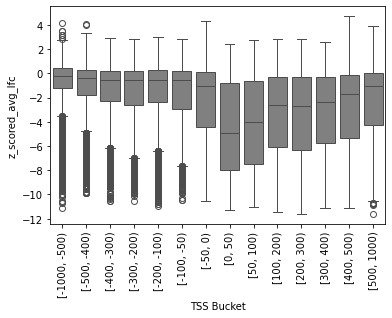

In [14]:
sns.boxplot(
                x = annot_guide_lfcs_HCT116_Kox1[annot_guide_lfcs_HCT116_Kox1['Category'] == 'Essential']['TSS Bucket'], 
                y = annot_guide_lfcs_HCT116_Kox1[annot_guide_lfcs_HCT116_Kox1['Category'] == 'Essential']['z_scored_avg_lfc'], color = 'grey')

plt.xticks(rotation=90)


In [15]:


path_out = '../Data/PrimaryLibrary/processed_z_score/'
annot_guide_lfcs_HCT116_Kox1.to_csv(path_out + 'HCT116_Kox1_zscore.csv', index = False)